In [492]:
import mne

In [493]:
import pandas as pd

In [494]:
import json

In [495]:
%matplotlib inline
import matplotlib.pyplot as plt

In [496]:
import numpy as np

In [543]:
import matplotlib

In [497]:
ch_names = ["Fp1", "Fp2", "C3", "C4", 'O1', 'O2', "P7", "P8"]

In [498]:
sampling_freq = 256
n_channels = len(ch_names)
ch_types = ["eeg"] * n_channels

In [499]:
open_name = f"./valid-data/SavedData/OpenBCI-RAW-open-eyes.txt"
close_name = f"./valid-data/SavedData/OpenBCI-RAW-eyes-closed.txt"

In [526]:
def read_signal(name):
    signal_df = pd.read_csv(
        name,
        sep=", ", skiprows=6, names=["#"] + ch_names + ["x", "y", "z", "time", "timestamp"]
    )
    signal_df = signal_df.iloc[1:-1].copy()
    signal_df["time"] = pd.to_datetime(signal_df["time"]).dt.strftime("%Y-%m-%d %H:%M:%S")
    
    signal_info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
    signal_info.set_montage('standard_1020')
    
    data = signal_df[ch_names].values.T
    raw = mne.io.RawArray(data, signal_info)
    raw.notch_filter(50, notch_widths=3)
    raw.filter(7, 13)
    
    return raw

In [527]:
open_raw = read_signal(open_name)

/home/anatoli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


Creating RawArray with float64 data, n_channels=8, n_times=16562
    Range : 0 ... 16561 =      0.000 ...    64.691 secs
Ready.
Setting up band-stop filter from 48 - 52 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 48.00
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 47.75 Hz)
- Upper passband edge: 52.00 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 52.25 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lowe

In [528]:
close_raw = read_signal(close_name)

/home/anatoli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


Creating RawArray with float64 data, n_channels=8, n_times=16367
    Range : 0 ... 16366 =      0.000 ...    63.930 secs
Ready.
Setting up band-stop filter from 48 - 52 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 48.00
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 47.75 Hz)
- Upper passband edge: 52.00 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 52.25 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lowe

In [546]:
def plot_alpha(raw):
    old_rc = matplotlib.rcParams["figure.figsize"]
    matplotlib.rcParams["figure.figsize"] = (20, 10)
    mne.viz.plot_raw(
        raw,
        duration=10, 
        start=20, 
        show_scalebars=False, 
        scalings={"eeg": 30},
        show=False
    )
    matplotlib.rcParams["figure.figsize"] = old_rc

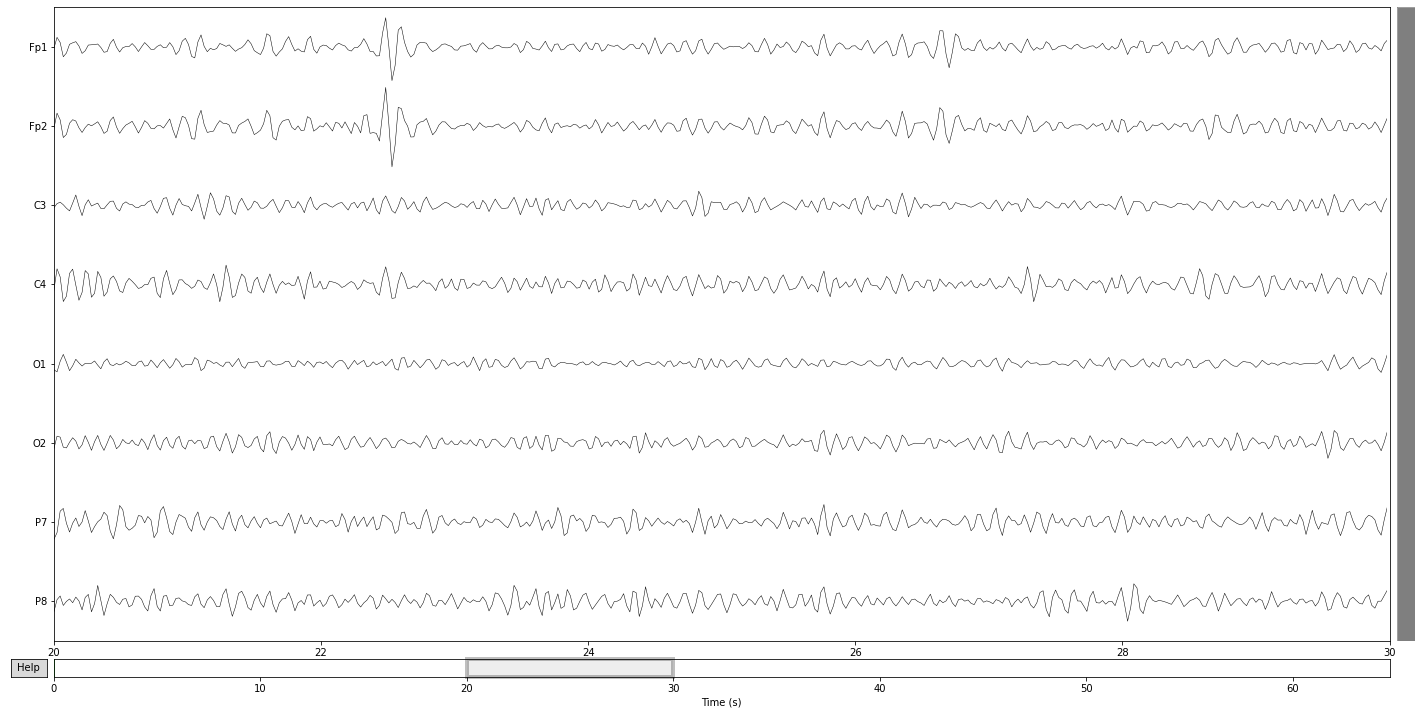

In [547]:
plot_alpha(open_raw)

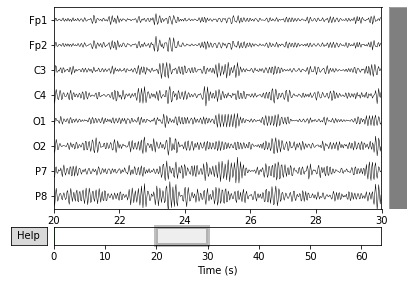

In [531]:
plot_alpha(close_raw)

In [532]:
from scipy import stats

In [533]:
import seaborn as sns

In [534]:
import numpy as np

In [535]:
open_sample = open_raw.get_data()[-1, :][3000:-3000]

In [536]:
len(open_sample)

10562

In [537]:
close_sample = close_raw.get_data()[-1, :][3000:-3000]

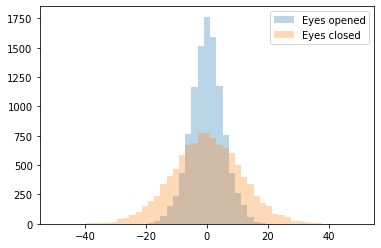

In [538]:
plt.hist(open_sample, bins=np.linspace(-50, 50, 50), alpha=0.3, label="Eyes opened")
plt.hist(close_sample, bins=np.linspace(-50, 50, 50), alpha=0.3, label="Eyes closed")
plt.legend()
plt.show()